<a href="https://colab.research.google.com/github/tmarissa/marissa_DATA606/blob/main/ipynb/503_K_Means_PCA_(cleansed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 606 Capstone
## Marissa Tan
### Impact of COVID-19 on the US Housing Market
__Density, Real Estate, and Rural Percentage (FIPS Level)__<br><br>
This notebook:
- Real Estate Dataset with removed outliers
- Kmeans uses Average Listing Price (2019 and 2021), rural percentage (2010) and Density (2020)
- Kmeans for 2019 and 2021
    - FIPS
    - Individual State  
        - Arizona
        - Massachussets
        
References:<br>
https://github.com/knoppin1/DATA-606-Capstone
https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/

In [ ]:
import pandas as pd
import matplotlib
from sklearn.cluster import KMeans
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# 1. Density and Real Estate

## 1.1 Read  CSV
- Load Density and Real Estate files that still contains outlier.
- Groupby FIPS and State



### 1.1a For the Year 2019

In [ ]:
df_2019 = pd.read_csv('df_2019.csv', index_col = False)
df_2019.sample(5)

,FIPS,year,state,county,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
3683,12125,2019,FL,Union County,66,325073.0,-0.0205,0.1550,239999.0,-0.1742,0.3267,67.447699,1,27.0
6896,17039,2019,IL,De Witt County,39,106402.0,-0.0917,-0.1585,79950.0,-0.0535,-0.1584,48.753095,2,130.0
9084,20095,2019,KS,Kingman County,8,95520.0,0.0660,-0.2587,60000.0,-0.0544,-0.2491,62.102316,1,38.0
19392,40137,2019,OK,Stephens County,49,146822.0,0.0340,0.1890,111000.0,0.0218,0.0571,43.324898,2,302.0
19814,41071,2019,OR,Yamhill County,150,622737.0,-0.0137,-0.1354,437400.0,0.0055,-0.0613,22.603410,2,411.0


In [ ]:
df_2019.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,30507.000000,30507.0,30507.000000,3.050700e+04,30475.000000,30402.000000,3.050700e+04,30475.000000,30402.000000,30507.000000,30507.000000,30507.000000
mean,30460.022585,2019.0,185.483364,2.509845e+05,0.007495,0.076221,1.959187e+05,0.010767,0.087112,60.047718,1.379126,393.214377
std,15115.862425,0.0,952.428290,1.355666e+05,0.127627,0.494169,9.545046e+04,0.198717,0.511591,30.177180,0.485178,992.919636
min,1001.000000,2019.0,0.000000,4.632000e+04,-0.939100,-0.990300,2.150000e+04,-0.905900,-0.975100,0.000000,1.000000,0.000000
25%,19003.000000,2019.0,16.000000,1.654610e+05,-0.021200,-0.039500,1.304290e+05,-0.022400,-0.033600,36.822160,1.000000,44.000000
50%,29167.000000,2019.0,40.000000,2.202060e+05,0.002200,0.039900,1.734000e+05,0.000000,0.045900,60.720947,1.000000,122.000000
75%,45079.000000,2019.0,99.000000,2.990315e+05,0.028600,0.132300,2.399000e+05,0.029950,0.138500,86.744724,2.000000,328.000000
max,56045.000000,2019.0,34979.000000,2.235543e+06,12.300000,39.000000,1.149000e+06,24.600000,39.000000,100.000000,2.000000,26147.000000


In [ ]:
# Groupby FIPS
df_FIPS_2019 = df_2019.groupby(by=['FIPS', 'state', 'county', 'density', 'rural_%', 'rural_cat'])['average_listing_price'].mean().reset_index()
df_FIPS_2019.head(3)

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price
0,1001,AL,Autauga County,98,42.002162,2,244277.166667
1,1005,AL,Barbour County,28,67.789635,1,250540.000000
2,1007,AL,Bibb County,35,68.352607,1,177650.916667


In [ ]:
df_FIPS_2019.describe()

,FIPS,density,rural_%,rural_cat,average_listing_price
count,2795.000000,2795.000000,2795.000000,2795.000000,2.795000e+03
mean,30491.929517,184.062612,60.659127,1.373166,2.523021e+05
std,15130.741479,936.309287,30.410925,0.483732,1.347981e+05
min,1001.000000,0.000000,0.000000,1.000000,6.579200e+04
25%,19016.000000,14.000000,36.968133,1.000000,1.664891e+05
50%,29179.000000,40.000000,61.379553,1.000000,2.214452e+05
75%,45088.000000,99.000000,90.111688,2.000000,3.001355e+05
max,56045.000000,34979.000000,100.000000,2.000000,2.022722e+06


### 1.1b For the Year 2021

In [ ]:
df_2021 = pd.read_csv('df_2021.csv', index_col = False)
df_2021.head(3)

,FIPS,year,state,county,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
0,4001,2021,AZ,Apache County,5,495914.0,-0.0197,0.1282,279000.0,-0.0016,-0.0571,74.061076,1,79.0
1,4001,2021,AZ,Apache County,5,491306.0,-0.0093,0.1099,276750.0,-0.0081,-0.0650,74.061076,1,76.0
2,4001,2021,AZ,Apache County,5,561300.0,0.1425,0.0189,279000.0,0.0081,-0.1143,74.061076,1,76.0


In [ ]:
# Groupby FIPS
df_FIPS_2021 = df_2021.groupby(by=['FIPS', 'state', 'county', 'density', 'rural_%', 'rural_cat'])['average_listing_price'].mean().reset_index()
df_FIPS_2021.sample(3)

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price
212,8014,CO,Broomfield County,2243,0.583299,2,776721.000000
2102,45039,SC,Fairfield County,30,78.314410,1,355318.833333
1728,37075,NC,Graham County,27,100.000000,1,587556.583333


In [ ]:
df_FIPS_2021.describe()

,FIPS,density,rural_%,rural_cat,average_listing_price
count,2834.000000,2834.000000,2834.000000,2834.000000,2.834000e+03
mean,30439.770995,183.900141,60.434689,1.376147,3.154307e+05
std,15095.385032,709.060663,30.674572,0.484503,1.837992e+05
min,1001.000000,0.000000,0.000000,1.000000,4.500000e+04
25%,19017.500000,15.000000,36.419391,1.000000,1.960992e+05
50%,29158.000000,40.000000,61.272599,1.000000,2.742977e+05
75%,45084.500000,102.000000,90.388467,2.000000,3.809048e+05
max,56045.000000,15692.000000,100.000000,2.000000,2.273151e+06


# 2. K-means

## 2.1 FIPS

### 2.1a For the Year 2019

In [ ]:
scaler = StandardScaler()
FIPS_2019 = df_FIPS_2019[["FIPS",'county', 'state', 'density', 'average_listing_price', 'rural_%', 'rural_cat']]
scale =scaler.fit_transform(FIPS_2019[['density', 'average_listing_price', 'rural_%']])
FIPS_2019_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
FIPS_2019_scale.head(5) 

,density,average_listing_price,rural_%
0,-0.091933,-0.059544,-0.613605
1,-0.166708,-0.013074,0.234514
2,-0.159231,-0.553899,0.253029
3,-0.099411,-0.169060,0.963391
4,-0.179527,0.060590,-0.305364


In [ ]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(FIPS_2019_scale)
pca_FIPS_2019 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_FIPS_2019.head(5)

,principal_component1,principal_component2
0,0.279593,-0.013112
1,-0.241934,-0.110424
2,-0.555471,0.281303
3,-0.726470,0.037995
4,0.114261,-0.164535


### Determine Optimal Clusters (Elbow Method)

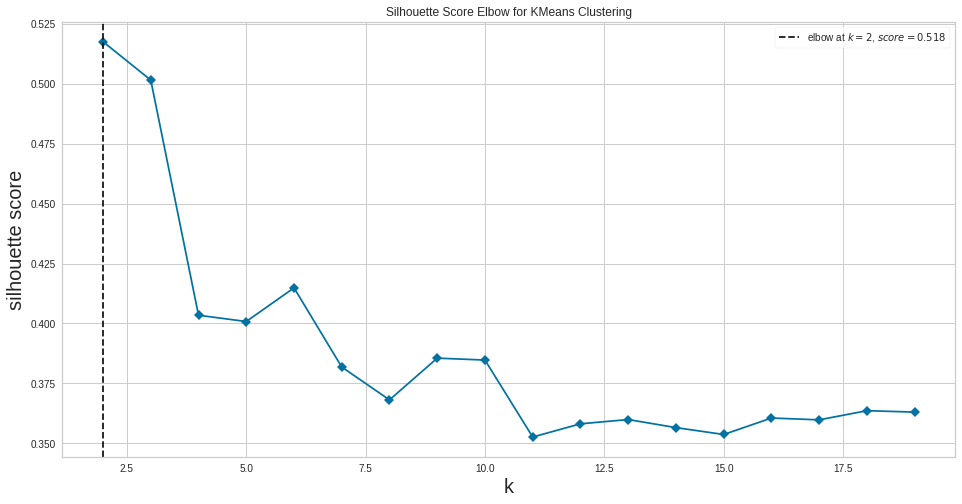

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings=False, s=30)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_FIPS_2019)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [ ]:
for i in range(3, 15):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_FIPS_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is " +str(
        metrics.silhouette_score(pca_FIPS_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 3 is 0.49632494265117366
Silhouette score for k(clusters)= 4 is 0.38946522161836195
Silhouette score for k(clusters)= 5 is 0.3961036018552728
Silhouette score for k(clusters)= 6 is 0.40537797736886527
Silhouette score for k(clusters)= 7 is 0.3719172390379398
Silhouette score for k(clusters)= 8 is 0.36772972261161774
Silhouette score for k(clusters)= 9 is 0.37786769128122544
Silhouette score for k(clusters)= 10 is 0.3719142284850404
Silhouette score for k(clusters)= 11 is 0.37773347295696613
Silhouette score for k(clusters)= 12 is 0.34550193049330796
Silhouette score for k(clusters)= 13 is 0.36717007738655216
Silhouette score for k(clusters)= 14 is 0.3556125212892706


In [ ]:
K = range(2, 12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_FIPS_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
# Sum of Square errors 
kmeans.inertia_

676.2238258452103

In [ ]:
# No of iteration required to convergence
kmeans.n_iter_

20

In [ ]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_FIPS_2019)
Counter(labels)

Counter({0: 684,
         1: 29,
         2: 122,
         3: 1,
         4: 404,
         5: 4,
         6: 196,
         7: 806,
         8: 39,
         9: 2,
         10: 508})

In [ ]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
3,0,684
7,1,29
4,2,122
10,3,1
2,4,404
8,5,4
5,6,196
1,7,806
6,8,39
9,9,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'Counties')

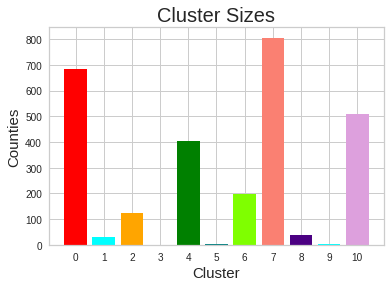

In [ ]:
plt.bar('cluster', 'counties', data=counter_df, 
        color=['red', 'cyan', 'orange', 'blue', 'green', 'teal', 'chartreuse', 'salmon', 'indigo', 'aqua', 'plum'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [ ]:
pca_FIPS_2019['cluster'] = labels
kmeans.cluster_centers_

array([[-1.14241764,  0.32028178],
       [ 3.50846227,  2.00922853],
       [ 1.79784653,  0.18442488],
       [23.63232846, 24.34824035],
       [-0.15009577, -0.52581403],
       [11.62285437,  6.50462546],
       [ 1.34620543, -1.2347063 ],
       [-0.31653646,  0.2922737 ],
       [ 3.39078973, -2.19991392],
       [ 8.29036167, -9.35357132],
       [ 0.56667925, -0.05215238]])

In [ ]:
# Look at outlier
pca_FIPS_2019[pca_FIPS_2019.cluster==4][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
4,0.114261,-0.164535
8,-0.470411,-0.248321
9,-0.413531,-0.316684
13,-0.752463,-0.280421
19,-0.030514,-0.376533
...,...,...
2768,-0.183119,-0.584522
2778,0.074995,-0.235005
2779,-0.407326,-0.751866
2780,0.258974,-0.366396


In [ ]:
km = KMeans(n_clusters=11)
kmeans = km.fit(pca_FIPS_2019)

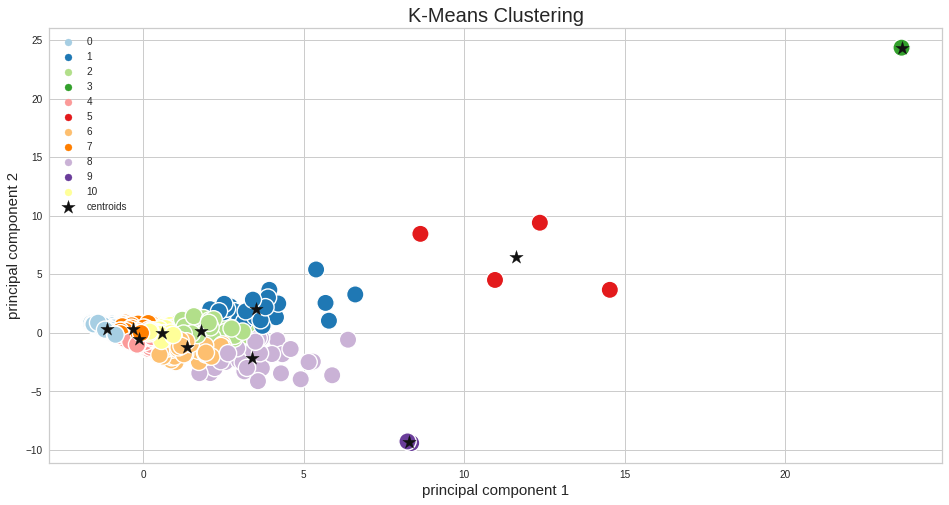

In [ ]:

fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_FIPS_2019, palette = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.legend()
plt.show()

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [ ]:
pca_FIPS_2019.head(3)

,principal_component1,principal_component2,cluster
0,0.279593,-0.013112,10
1,-0.241934,-0.110424,7
2,-0.555471,0.281303,7


In [ ]:
FIPS_2019.head(3)

,FIPS,county,state,density,average_listing_price,rural_%,rural_cat
0,1001,Autauga County,AL,98,244277.166667,42.002162,2
1,1005,Barbour County,AL,28,250540.000000,67.789635,1
2,1007,Bibb County,AL,35,177650.916667,68.352607,1


In [ ]:
FIPS_2019['cluster']=pca_FIPS_2019['cluster']
FIPS_2019[['county','state', 'density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,state,density,average_listing_price,rural_%,cluster
0,Autauga County,AL,98,244277.166667,42.002162,10
1,Barbour County,AL,28,250540.000000,67.789635,7
2,Bibb County,AL,35,177650.916667,68.352607,7


In [ ]:
FIPS_2019[(FIPS_2019['cluster']==8)]

,FIPS,county,state,density,average_listing_price,rural_%,rural_cat,cluster
88,4005,Coconino County,AZ,7,6.668912e+05,31.466066,2,8
93,4013,Maricopa County,AZ,480,6.675222e+05,2.363800,2,8
177,6017,El Dorado County,CA,111,7.014206e+05,34.699930,2,8
193,6065,Riverside County,CA,335,6.204184e+05,4.622310,2,8
195,6069,San Benito County,CA,46,7.082345e+05,24.004415,2,8
201,6095,Solano County,CA,551,5.577597e+05,3.718452,2,8
208,6113,Yolo County,CA,213,7.066548e+05,6.929584,2,8
212,8005,Arapahoe County,CO,820,6.333847e+05,1.575587,2,8
213,8007,Archuleta County,CO,9,7.638628e+05,59.376034,1,8
216,8014,Broomfield County,CO,2243,6.668822e+05,0.583299,2,8


### Function to Identify the Cluster's Properties
This can only identify thirteen or less clusters

In [ ]:
def cluster_properties (a):
  count= []
  c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13 = [], [], [], [], [], [], [], [], [], [], [], [], [], []

  for x in range(0, len(a)-1):
    if x == 0:
      c0.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c0[0]['cluster']['count'])
      DF = c0[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF = pd.DataFrame(DF, columns= [x])
    elif x == 1:
      c1.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c1[0]['cluster']['count'])  
      DF1 = c1[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF1 = pd.DataFrame(DF1, columns= [x])
      DF = DF.join(DF1.reindex(DF.index, level=0))
    elif x == 2:
      c2.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c2[0]['cluster']['count'])
      DF2 = c2[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF2 = pd.DataFrame(DF2, columns= [x])
      DF = DF.join(DF2.reindex(DF.index, level=0))
    elif x == 3:
      c3.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c3[0]['cluster']['count'])
      DF3 = c3[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF3 = pd.DataFrame(DF3, columns= [x])
      DF = DF.join(DF3.reindex(DF.index, level=0))
    elif x == 4:
      c4.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c4[0]['cluster']['count'])
      DF4 = c4[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF4 = pd.DataFrame(DF4, columns= [x])
      DF = DF.join(DF4.reindex(DF.index, level=0))
    elif x == 5:
      c5.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c5[0]['cluster']['count'])
      DF5 = c5[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF5 = pd.DataFrame(DF5, columns= [x])
      DF = DF.join(DF5.reindex(DF.index, level=0))
    elif x == 6:
      c6.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c6[0]['cluster']['count'])
      DF6 = c6[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF6 = pd.DataFrame(DF6, columns= [x])
      DF = DF.join(DF6.reindex(DF.index, level=0))
    elif x == 7:
      c7.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c7[0]['cluster']['count'])
      DF7 = c7[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF7 = pd.DataFrame(DF7, columns= [x])
      DF = DF.join(DF7.reindex(DF.index, level=0))
    elif x == 8:
      c8.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c8[0]['cluster']['count'])
      DF8 = c8[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF8 = pd.DataFrame(DF8, columns= [x])
      DF = DF.join(DF8.reindex(DF.index, level=0))
    elif x == 9:
      c9.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c9[0]['cluster']['count'])
      DF9 = c9[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF9 = pd.DataFrame(DF9, columns= [x])
      DF = DF.join(DF9.reindex(DF.index, level=0))
    elif x == 10:
      c10.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c10[0]['cluster']['count'])  
      DF10 = c10[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF10 = pd.DataFrame(DF10, columns= [x])
      DF = DF.join(DF10.reindex(DF.index, level=0))
    elif x == 11:
      c11.append(a[(a['cluster']==x)].describe().iloc[[0, 1, 3, -1]])
      count.append(c11[0]['cluster']['count'])  
      DF11 = c11[0][['density', 'average_listing_price', 'rural_%', 'rural_cat']].iloc[[2, 1, 3]].unstack()
      DF11= pd.DataFrame(DF11, columns= [x])
      DF = DF.join(DF11.reindex(DF.index, level=0))
  
  df1 = DF.T
  df1['count']= pd.DataFrame(count)
  df1.reset_index(inplace=True)
  df2 = df1.rename(columns = {'index':'cluster'})
  df2 = df2.dropna()
  return df2

### Identify the Cluster's Properties

In [ ]:
cluster_properties(FIPS_2019)

cluster  density                        average_listing_price  \
                min          mean      max                   min   
0        0      0.0     17.700292     94.0          6.579200e+04   
1        1   2102.0   3434.655172   7236.0          1.678355e+05   
2        2    274.0    938.573770   2129.0          1.618717e+05   
3        3  34979.0  34979.000000  34979.0          5.641794e+05   
4        4      0.0     45.356436    161.0          2.455180e+05   
5        5  11294.0  13166.750000  15692.0          3.223845e+05   
6        6      0.0    143.224490    800.0          3.442779e+05   
7        7      0.0     52.905707    352.0          6.652117e+04   
8        8      2.0    841.743590   4101.0          5.577597e+05   
9        9    118.0    129.500000    141.0          2.000211e+06   
10      10      1.0    154.460630    651.0          1.233278e+05   

                                  rural_%                        rural_cat  \
            mean           max        min       mean         max       min   
0   1.655039e+05  2.740892e+05  61.264763  95.126549  100.000000       1.0   
1   3.361789e+05  6.958930e+05   0.000000   0.377849    2.410090       2.0   
2   3.279037e+05  5.315535e+05   0.000000   8.286288   21.257111       2.0   
3   5.641794e+05  5.641794e+05   0.002816   0.002816    0.002816       2.0   
4   3.300792e+05  5.201963e+05  51.374382  80.670375  100.000000       1.0   
5   8.582198e+05  1.471328e+06   0.000000   0.018523    0.074091       2.0   
6   4.810511e+05  6.992108e+05   1.306073  39.824418  100.000000       1.0   
7   1.791767e+05  2.692747e+05  17.396226  56.924635   91.877667       1.0   
8   7.631407e+05  1.154390e+06   0.101534  17.720155  100.000000       1.0   
9   2.011467e+06  2.022722e+06  12.860145  13.714002   14.567860       2.0   
10  2.606089e+05  3.965122e+05   2.599639  32.396754   60.014880       1.0   

                   count  
        mean  max         
0   1.000000  1.0  684.0  
1   2.000000  2.0   29.0  
2   2.000000  2.0  122.0  
3   2.000000  2.0    1.0  
4   1.000000  1.0  404.0  
5   2.000000  2.0    4.0  
6   1.714286  2.0  196.0  
7   1.311414  2.0  806.0  
8   1.897436  2.0   39.0  
9   2.000000  2.0    2.0  
10  1.903543  2.0  508.0

### 2.1b For the Year 2021

In [ ]:
FIPS_2021 = df_FIPS_2021[['FIPS','county','density', 'state','average_listing_price', 'rural_%', 'rural_cat']]
scale = scaler.fit_transform(FIPS_2021[['density', 'average_listing_price', 'rural_%']])
FIPS_scale_2021 = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
FIPS_scale_2021.sample(5)

,density,average_listing_price,rural_%
1726,0.643359,0.081701,-1.329905
1506,-0.256582,-0.583267,1.290068
874,-0.211444,-0.800492,-1.597908
1794,-0.256582,-0.372015,1.290068
2260,-0.116936,0.277321,1.290068


In [ ]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(FIPS_scale_2021)
pca_FIPS_2021 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_FIPS_2021.head(5)

,principal_component1,principal_component2
0,0.215440,-0.254357
1,-0.341779,0.060836
2,-0.625092,-0.399178
3,-0.697706,0.287200
4,-0.504777,-0.884311


### Determine Optimal Clusters (Elbow Method)

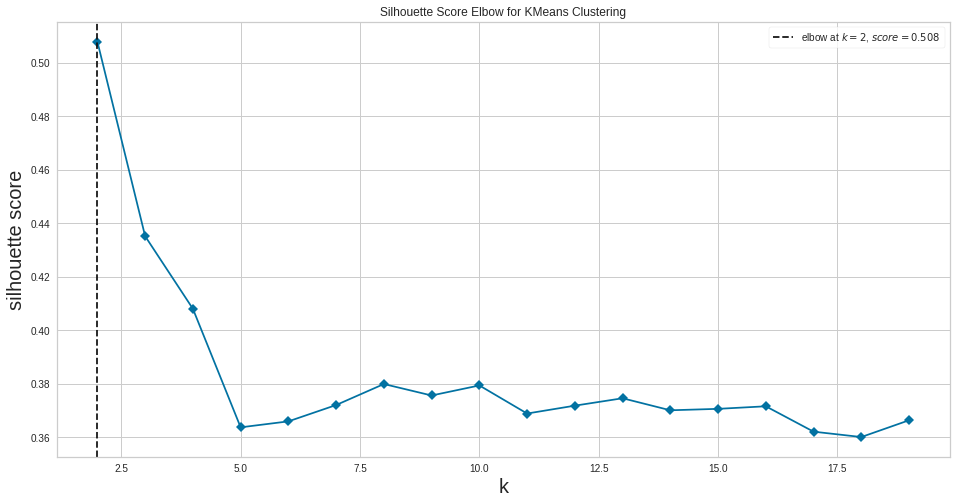

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_FIPS_2021)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [ ]:
for i in range(3, 15):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_FIPS_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_FIPS_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 3 is 0.4667729821806874
Silhouette score for k(clusters)= 4 is 0.41300795078498365
Silhouette score for k(clusters)= 5 is 0.37250228221756504
Silhouette score for k(clusters)= 6 is 0.3692592985690797
Silhouette score for k(clusters)= 7 is 0.3772654231153469
Silhouette score for k(clusters)= 8 is 0.3808065044804516
Silhouette score for k(clusters)= 9 is 0.37499614315212204
Silhouette score for k(clusters)= 10 is 0.3784138779878583
Silhouette score for k(clusters)= 11 is 0.37767568758756426
Silhouette score for k(clusters)= 12 is 0.3744613655500963
Silhouette score for k(clusters)= 13 is 0.379042679654521
Silhouette score for k(clusters)= 14 is 0.3717952769554427


In [ ]:
K = range(2, 12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_FIPS_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
# Sum of Square errors 
kmeans.inertia_

876.6083334147881

In [ ]:
# No. of iteration required to converge
kmeans.n_iter_

48

In [ ]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_FIPS_2021)
Counter(labels)

Counter({0: 395,
         1: 143,
         2: 38,
         3: 117,
         4: 518,
         5: 5,
         6: 30,
         7: 345,
         8: 158,
         9: 629,
         10: 456})

In [ ]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
0,0,395
6,1,143
9,2,38
7,3,117
3,4,518
10,5,5
8,6,30
4,7,345
5,8,158
1,9,629


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'Counties')

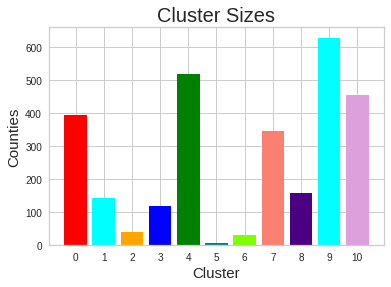

In [ ]:
plt.bar('cluster', 'counties', data=counter_df, 
        color=['red', 'cyan', 'orange', 'blue', 'green', 'teal', 'chartreuse', 'salmon', 'indigo', 'aqua', 'plum'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [ ]:
pca_FIPS_2021['cluster'] = labels
kmeans.cluster_centers_

array([[ 0.24708498, -0.65312587],
       [ 0.38089588,  1.75366481],
       [ 4.1895597 , -2.00573717],
       [ 1.95228737,  1.1355253 ],
       [-1.27918388, -0.18918815],
       [13.2422673 , -5.76675224],
       [ 3.26515451,  3.77518375],
       [ 0.58940721,  0.20044073],
       [ 1.68400956, -0.59695764],
       [-0.44219106, -0.39974833],
       [-0.51065666,  0.52610812]])

In [ ]:
# Look at outlier
pca_FIPS_2021[pca_FIPS_2021.cluster==4][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
10,-1.304485,-0.133891
16,-0.955390,-0.366169
19,-1.091771,0.202755
30,-1.134376,0.152265
31,-0.905058,0.049160
...,...,...
2757,-1.115587,0.167290
2761,-1.048007,-0.090970
2768,-1.052296,0.292427
2782,-1.038240,0.281448


In [ ]:
km = KMeans(n_clusters=11)
kmeans = km.fit(pca_FIPS_2021)

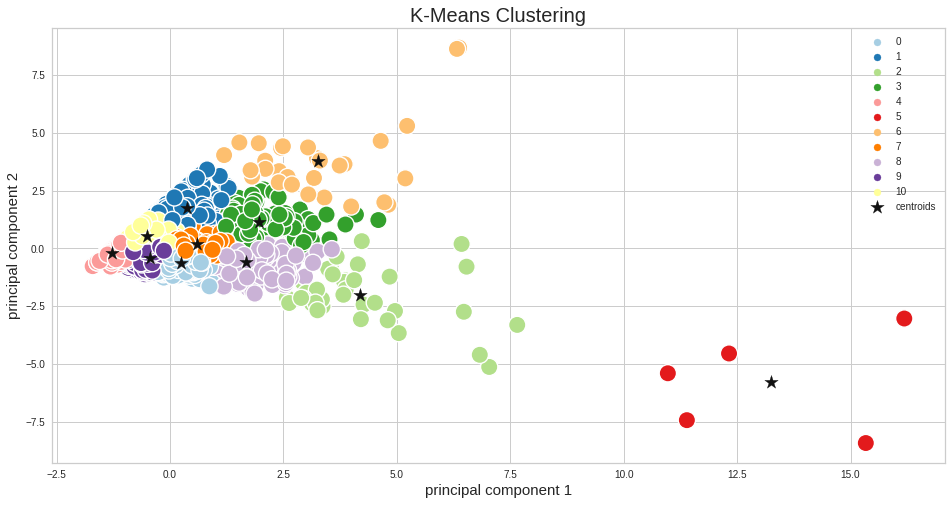

In [ ]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_FIPS_2021, palette = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.legend()
plt.show()

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [ ]:
pca_FIPS_2021.head(3)

,principal_component1,principal_component2,cluster
0,0.215440,-0.254357,0
1,-0.341779,0.060836,9
2,-0.625092,-0.399178,9


In [ ]:
FIPS_2021['cluster']=pca_FIPS_2021['cluster']
FIPS_2021[['county', 'state', 'density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,state,density,average_listing_price,rural_%,cluster
0,Autauga County,AL,98,286362.666667,42.002162,0
1,Barbour County,AL,28,292979.750000,67.789635,9
2,Bibb County,AL,35,193595.583333,68.352607,9


In [ ]:
FIPS_2021[(FIPS_2021['cluster']==7)]

,FIPS,county,density,state,average_listing_price,rural_%,rural_cat,cluster
24,1051,Elmore County,142,AL,335972.083333,54.188366,1,7
37,1077,Lauderdale County,140,AL,330298.333333,49.295106,2,7
39,1081,Lee County,286,AL,392050.750000,27.408717,2,7
40,1083,Limestone County,184,AL,378212.100000,57.609142,1,7
46,1095,Marshall County,172,AL,385386.750000,53.268687,1,7
...,...,...,...,...,...,...,...,...
2823,56013,Fremont County,4,WY,391933.818182,51.424370,1,7
2826,56021,Laramie County,37,WY,428054.200000,19.784604,2,7
2827,56025,Natrona County,14,WY,372003.636364,14.449304,2,7
2831,56041,Uinta County,9,WY,352368.750000,43.095937,2,7


In [ ]:
FIPS_2021[(FIPS_2021['cluster']==4)]

,FIPS,county,density,state,average_listing_price,rural_%,rural_cat,cluster
10,1023,Choctaw County,13,AL,184010.750000,100.000000,1,4
16,1035,Conecuh County,13,AL,172370.333333,80.949501,1,4
19,1041,Crenshaw County,21,AL,257655.083333,100.000000,1,4
30,1063,Greene County,11,AL,245440.000000,100.000000,1,4
31,1065,Hale County,22,AL,246527.416667,89.168782,1,4
...,...,...,...,...,...,...,...,...
2757,55011,Buffalo County,19,WI,249743.083333,100.000000,1,4
2761,55019,Clark County,28,WI,211946.083333,91.729605,1,4
2768,55037,Florence County,9,WI,275393.083333,100.000000,1,4
2782,55065,Lafayette County,26,WI,275286.083333,100.000000,1,4


### Identify the Cluster's Properties

In [ ]:
cluster_properties(FIPS_2021)

cluster  density                        average_listing_price  \
                min          mean      max                   min   
0        0      1.0    109.387342    555.0          86360.666667   
1        1      0.0     40.223776    213.0         487618.000000   
2        2   2058.0   3356.184211   7236.0         200961.750000   
3        3      7.0    370.444444   2102.0         504610.833333   
4        4      0.0     15.463320    104.0          45000.000000   
5        5  10609.0  12655.200000  15692.0         400957.000000   
6        6      1.0    392.333333   1995.0         952554.818182   
7        7      0.0    132.762319    520.0         307491.000000   
8        8    170.0    799.639241   2003.0         154521.916667   
9        9      0.0     43.379968    161.0          77320.000000   
10      10      0.0     41.333333    161.0         260769.250000   

                                  rural_%                        rural_cat  \
            mean           max        min       mean         max       min   
0   2.224044e+05  3.136988e+05   2.577059  31.976460   55.920926       1.0   
1   6.349896e+05  9.464130e+05  40.928043  79.976129  100.000000       1.0   
2   4.258231e+05  9.987997e+05   0.000000   0.430365    2.410090       2.0   
3   6.668338e+05  9.537398e+05   0.016933  19.902511   49.900000       2.0   
4   1.767891e+05  2.806300e+05  75.240715  97.832735  100.000000       1.0   
5   8.520966e+05  1.582755e+06   0.000000   0.014818    0.074091       2.0   
6   1.214857e+06  2.273151e+06   0.862877  31.795603  100.000000       1.0   
7   3.938087e+05  5.444362e+05   8.996225  39.747462   65.194462       1.0   
8   3.703593e+05  6.527079e+05   0.000000   9.996783   24.720442       2.0   
9   2.081856e+05  3.192226e+05  41.061693  61.612874   84.618421       1.0   
10  3.584741e+05  5.050465e+05  58.647744  85.924362  100.000000       1.0   

                   count  
        mean  max         
0   1.989873  2.0  395.0  
1   1.055944  2.0  143.0  
2   2.000000  2.0   38.0  
3   2.000000  2.0  117.0  
4   1.000000  1.0  518.0  
5   2.000000  2.0    5.0  
6   1.700000  2.0   30.0  
7   1.750725  2.0  345.0  
8   2.000000  2.0  158.0  
9   1.109698  2.0  629.0  
10  1.000000  1.0  456.0

## 2.2 Individual State - Arizona

### 2.2a For the Year 2019

In [ ]:
AZ_2019 = df_FIPS_2019[(df_FIPS_2019['state'] == 'AZ')]
AZ_2019

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price
86,4001,AZ,Apache County,5,74.061076,1,463216.250000
87,4003,AZ,Cochise County,20,36.301067,2,252562.333333
88,4005,AZ,Coconino County,7,31.466066,2,666891.166667
89,4007,AZ,Gila County,11,41.062000,2,471559.333333
90,4009,AZ,Graham County,8,46.437399,2,241557.583333
91,4011,AZ,Greenlee County,5,46.568686,2,239195.500000
92,4012,AZ,La Paz County,3,56.327786,1,315948.583333
93,4013,AZ,Maricopa County,480,2.363800,2,667522.250000
94,4015,AZ,Mohave County,16,22.963644,2,374457.583333
95,4017,AZ,Navajo County,10,54.138242,1,391470.833333


In [ ]:
AZ_2019.shape

(15, 7)

In [ ]:
scaler = StandardScaler()
scale =scaler.fit_transform(AZ_2019[['density', 'average_listing_price', 'rural_%']])
AZ_2019_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
AZ_2019_scale.head(5) 

,density,average_listing_price,rural_%
0,-0.447950,0.378135,2.094111
1,-0.319557,-1.100545,0.114922
2,-0.430831,1.807827,-0.138504
3,-0.396593,0.436699,0.364466
4,-0.422272,-1.177793,0.646218


In [ ]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(AZ_2019_scale)
pca_AZ_2019 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_AZ_2019.head(5)

,principal_component1,principal_component2
0,-1.301200,-1.592304
1,-0.820060,0.782015
2,0.692500,-1.391217
3,-0.251389,-0.598007
4,-1.228820,0.516832


### Determine Optimal Clusters (Elbow Method)

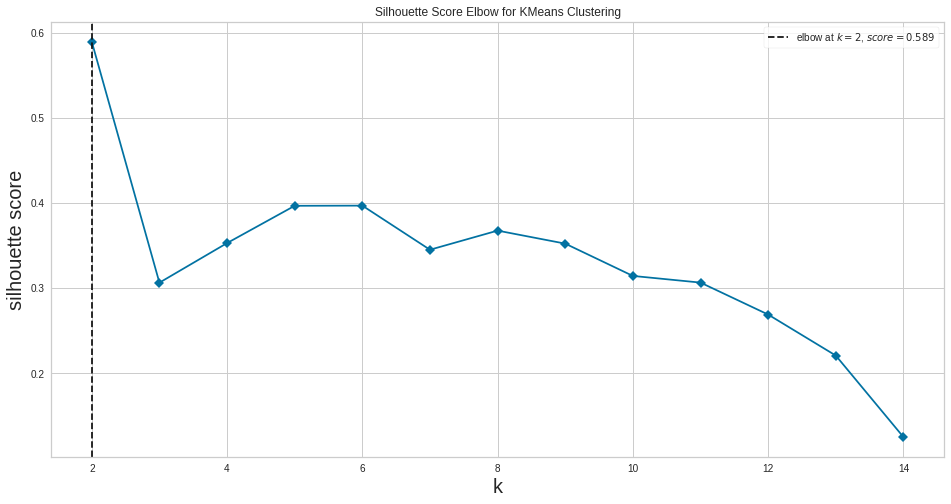

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_AZ_2019)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [ ]:
for i in range(2, 10):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_AZ_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_AZ_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.5892476057423935
Silhouette score for k(clusters)= 3 is 0.3064813351391376
Silhouette score for k(clusters)= 4 is 0.3529238667247094
Silhouette score for k(clusters)= 5 is 0.3966856479235866
Silhouette score for k(clusters)= 6 is 0.39688501562520684
Silhouette score for k(clusters)= 7 is 0.3488268254071955
Silhouette score for k(clusters)= 8 is 0.3675558459327597
Silhouette score for k(clusters)= 9 is 0.3522824218155417


In [ ]:
K = range(2, 6)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_AZ_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
# Sum of Square Errors
kmeans.inertia_

4.221768719352836

In [ ]:
# No. of iterator required to converge
kmeans.n_iter_

3

In [ ]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_AZ_2019)
Counter(labels)

Counter({0: 4, 1: 1, 2: 5, 3: 3, 4: 2})

In [ ]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
1,0,4
3,1,1
4,2,5
0,3,3
2,4,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

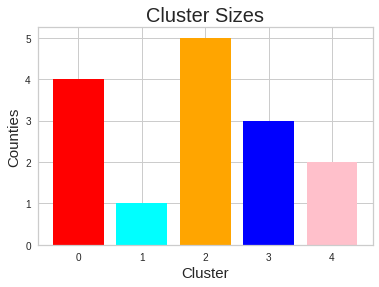

In [ ]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [ ]:
pca_AZ_2019['cluster'] = labels
kmeans.cluster_centers_

array([[-1.15017207,  0.402371  ],
       [ 4.21661939, -0.15632806],
       [ 0.32096421,  0.76047776],
       [-0.8264202 , -0.91737858],
       [ 0.62925423, -1.2517045 ]])

In [ ]:
# Look at outlier
pca_AZ_2019[pca_AZ_2019.cluster==0][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
1,-0.820060,0.782015
4,-1.228820,0.516832
5,-1.257778,0.523857
6,-1.294030,-0.213219


In [ ]:
km = KMeans(n_clusters=5)
kmeans = km.fit(pca_AZ_2019)

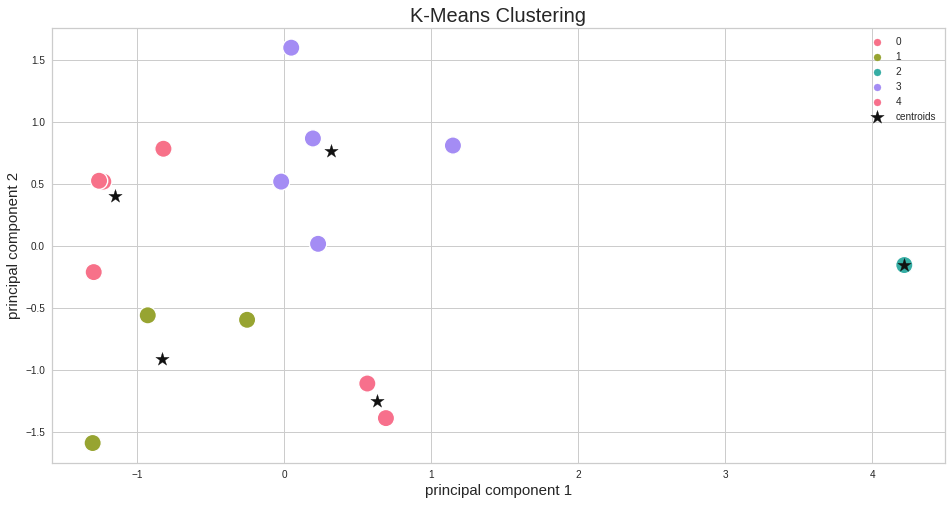

In [ ]:
pca_AZ_2019['cluster']=km.labels_
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2019, palette = 'husl')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.show()

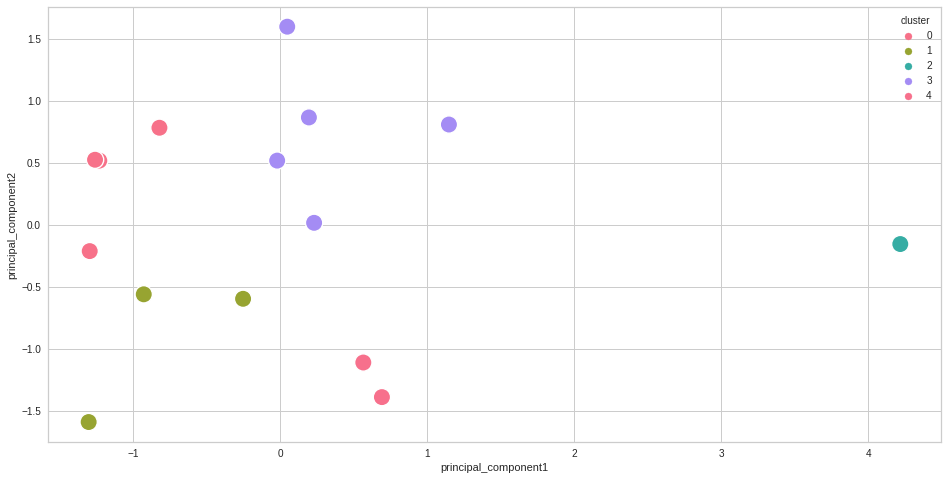

In [ ]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2019, palette = 'husl')

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [ ]:
pca_AZ_2019.head(3)

,principal_component1,principal_component2,cluster
0,-1.30120,-1.592304,1
1,-0.82006,0.782015,0
2,0.69250,-1.391217,4


In [ ]:
AZ_2019['county'].unique()

array(['Apache County', 'Cochise County', 'Coconino County',
       'Gila County', 'Graham County', 'Greenlee County', 'La Paz County',
       'Maricopa County', 'Mohave County', 'Navajo County', 'Pima County',
       'Pinal County', 'Santa Cruz County', 'Yavapai County',
       'Yuma County'], dtype=object)

In [ ]:
AZ_2019['cluster']= labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
AZ_2019[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

,county,density,average_listing_price,rural_%,cluster
86,Apache County,5,463216.250000,74.061076,3
87,Cochise County,20,252562.333333,36.301067,0
88,Coconino County,7,666891.166667,31.466066,4


In [ ]:
AZ_2019[(AZ_2019['cluster']==2)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
94,4015,AZ,Mohave County,16,22.963644,2,374457.583333,2
96,4019,AZ,Pima County,113,7.523491,2,421055.583333,2
97,4021,AZ,Pinal County,79,21.904623,2,325836.833333,2
98,4023,AZ,Santa Cruz County,38,26.883172,2,444905.083333,2
100,4027,AZ,Yuma County,36,10.429576,2,254077.416667,2


In [ ]:
AZ_2019

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
86,4001,AZ,Apache County,5,74.061076,1,463216.250000,3
87,4003,AZ,Cochise County,20,36.301067,2,252562.333333,0
88,4005,AZ,Coconino County,7,31.466066,2,666891.166667,4
89,4007,AZ,Gila County,11,41.062000,2,471559.333333,3
90,4009,AZ,Graham County,8,46.437399,2,241557.583333,0
91,4011,AZ,Greenlee County,5,46.568686,2,239195.500000,0
92,4012,AZ,La Paz County,3,56.327786,1,315948.583333,0
93,4013,AZ,Maricopa County,480,2.363800,2,667522.250000,1
94,4015,AZ,Mohave County,16,22.963644,2,374457.583333,2
95,4017,AZ,Navajo County,10,54.138242,1,391470.833333,3


### Identifies the Cluster's Properties

In [ ]:
cluster_properties(AZ_2019)

cluster density                    average_listing_price                 \
              min        mean    max                   min           mean   
0       0     3.0    9.000000   20.0         239195.500000  262316.000000   
1       1   480.0  480.000000  480.0         667522.250000  667522.250000   
2       2    16.0   56.400000  113.0         254077.416667  364066.500000   
3       3     5.0    8.666667   11.0         391470.833333  442082.138889   
4       4     7.0   18.000000   29.0         609945.666667  638418.416667   

                    rural_%                       rural_cat                 \
             max        min       mean        max       min      mean  max   
0  315948.583333  36.301067  46.408734  56.327786       1.0  1.750000  2.0   
1  667522.250000   2.363800   2.363800   2.363800       2.0  2.000000  2.0   
2  444905.083333   7.523491  17.940901  26.883172       2.0  2.000000  2.0   
3  471559.333333  41.062000  56.420439  74.061076       1.0  1.333333  2.0   
4  666891.166667  31.466066  32.331622  33.197178       2.0  2.000000  2.0   

  count  
         
0   4.0  
1   1.0  
2   5.0  
3   3.0  
4   2.0

### 2.2b For the Year 2021

In [ ]:
AZ_2021 = df_FIPS_2021[(df_FIPS_2021['state'] == 'AZ')]
AZ_2021.shape

(15, 7)

In [ ]:
scale =scaler.fit_transform(AZ_2021[['density', 'average_listing_price', 'rural_%']])
AZ_2021_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
AZ_2021_scale.head(5) 

,density,average_listing_price,rural_%
0,-0.447950,0.176940,2.094111
1,-0.319557,-1.069204,0.114922
2,-0.430831,1.654286,-0.138504
3,-0.396593,0.545960,0.364466
4,-0.422272,-1.606393,0.646218


In [ ]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(AZ_2021_scale)
pca_AZ_2021 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_AZ_2021.head(5)

,principal_component1,principal_component2
0,-1.611692,-1.046004
1,-0.606853,0.924118
2,0.255065,-1.425383
3,-0.360056,-0.640160
4,-1.174367,1.184367


### Determine Optimal Clusters (Elbow Method)

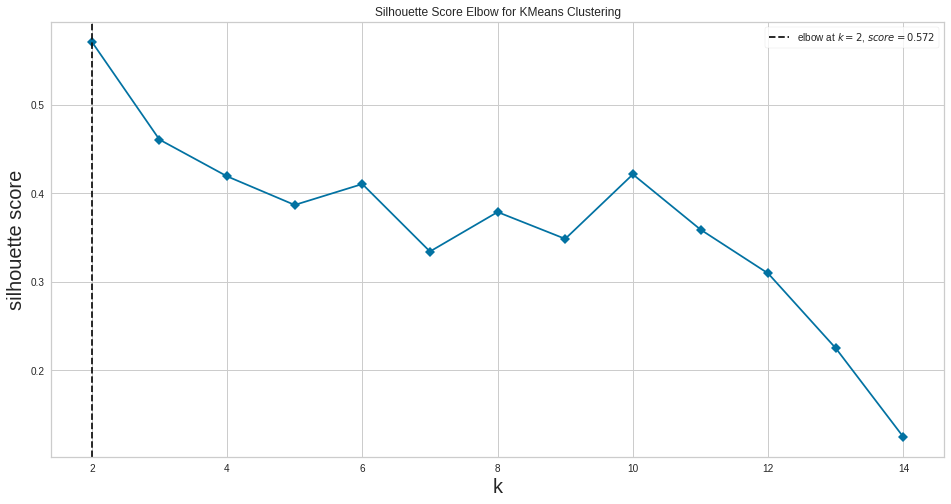

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'silhouette', timings=False)
fig = plt.figure(figsize=(16,8))
visualizer.fit(pca_AZ_2021)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [ ]:
for i in range(2, 10):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_AZ_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_AZ_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.5716510301888433
Silhouette score for k(clusters)= 3 is 0.46096565667065803
Silhouette score for k(clusters)= 4 is 0.41941563873919996
Silhouette score for k(clusters)= 5 is 0.3870170049976736
Silhouette score for k(clusters)= 6 is 0.41066479984059157
Silhouette score for k(clusters)= 7 is 0.3703882829980734
Silhouette score for k(clusters)= 8 is 0.348464898412162
Silhouette score for k(clusters)= 9 is 0.3486803708840085


In [ ]:
K = range(2, 6)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_AZ_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
# Sum of Square Errors
kmeans.inertia_

3.784010910828804

In [ ]:
# No. of iteration required to converge
kmeans.n_iter_

2

In [ ]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_AZ_2021)
Counter(labels)

Counter({0: 4, 1: 5, 2: 1, 3: 3, 4: 2})

In [ ]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
4,0,4
0,1,5
3,2,1
2,3,3
1,4,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

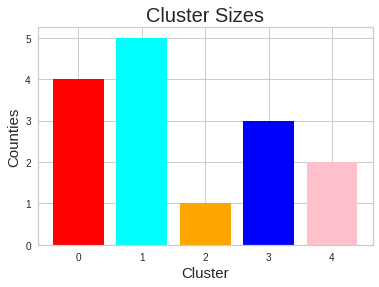

In [ ]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [ ]:
pca_AZ_2021['cluster'] = labels
kmeans.cluster_centers_

array([[ 0.39436609,  1.19212075],
       [-0.9274376 , -0.64779231],
       [ 4.01367275, -0.54291181],
       [ 0.27575677, -1.03169847],
       [-0.89060971,  1.05424289]])

In [ ]:
# Look at outlier
pca_AZ_2021[pca_AZ_2021.cluster==0][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
8,-0.073851,0.879975
10,1.109404,0.976500
11,0.301087,1.032127
14,0.240825,1.879881


In [ ]:
km = KMeans(n_clusters=5)
kmeans = km.fit(pca_AZ_2021)

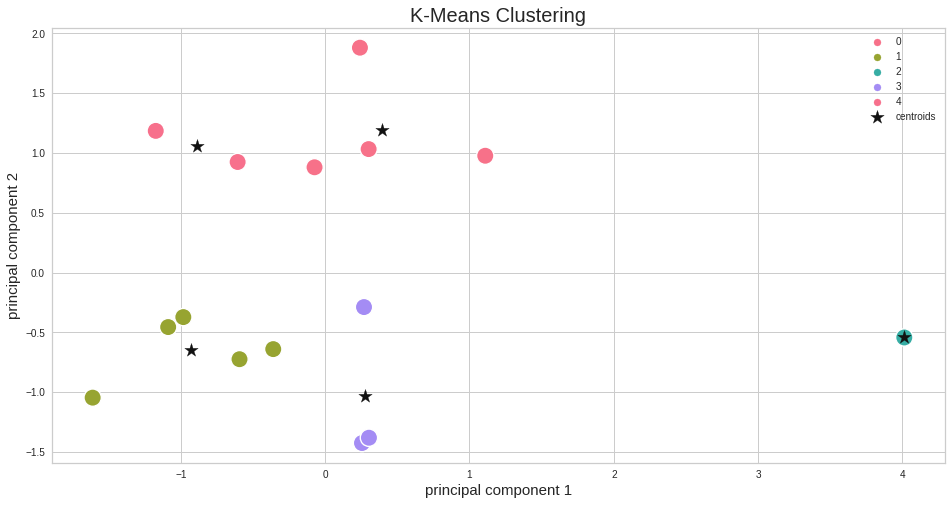

In [ ]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2021, palette = 'husl')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.legend()
plt.show()

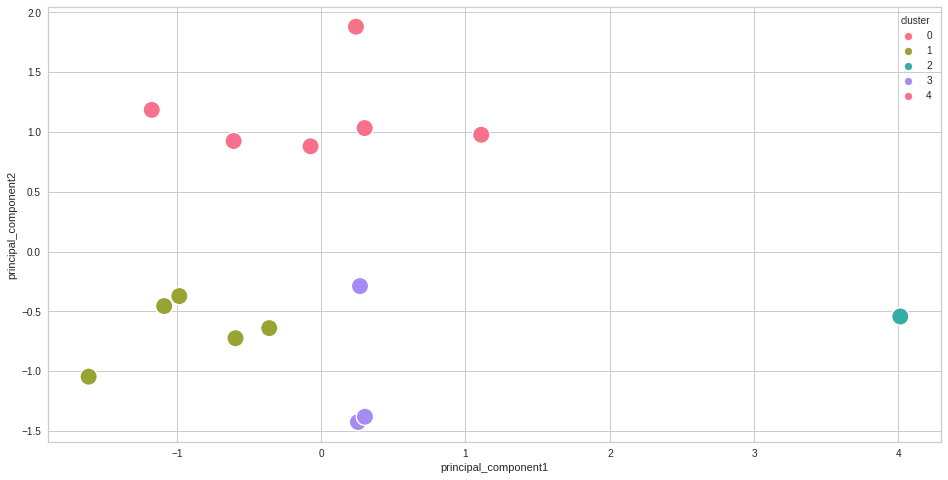

In [ ]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2021, palette = 'husl')

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [ ]:
pca_AZ_2021.head(3)

,principal_component1,principal_component2,cluster
0,-1.611692,-1.046004,1
1,-0.606853,0.924118,4
2,0.255065,-1.425383,3


In [ ]:
AZ_2021['cluster']=labels
AZ_2021[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
86,Apache County,5,626875.333333,74.061076,1
87,Cochise County,20,396628.916667,36.301067,4
88,Coconino County,7,899840.000000,31.466066,3


In [ ]:
AZ_2021[(AZ_2021['cluster']==0)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
94,4015,AZ,Mohave County,16,22.963644,2,467019.500000,0
96,4019,AZ,Pima County,113,7.523491,2,514230.166667,0
97,4021,AZ,Pinal County,79,21.904623,2,438229.500000,0
100,4027,AZ,Yuma County,36,10.429576,2,319238.000000,0


In [ ]:
AZ_2021

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
86,4001,AZ,Apache County,5,74.061076,1,626875.333333,1
87,4003,AZ,Cochise County,20,36.301067,2,396628.916667,4
88,4005,AZ,Coconino County,7,31.466066,2,899840.000000,3
89,4007,AZ,Gila County,11,41.062000,2,695058.083333,1
90,4009,AZ,Graham County,8,46.437399,2,297374.250000,4
91,4011,AZ,Greenlee County,5,46.568686,2,687275.666667,1
92,4012,AZ,La Paz County,3,56.327786,1,587637.666667,1
93,4013,AZ,Maricopa County,480,2.363800,2,833891.083333,2
94,4015,AZ,Mohave County,16,22.963644,2,467019.500000,0
95,4017,AZ,Navajo County,10,54.138242,1,580345.916667,1


### Identifies the Cluster's Properties

In [ ]:
cluster_properties(AZ_2021)

cluster density                    average_listing_price                 \
              min        mean    max                   min           mean   
0       0    16.0   61.000000  113.0         319238.000000  434679.291667   
1       1     3.0    6.800000   11.0         580345.916667  635438.533333   
2       2   480.0  480.000000  480.0         833891.083333  833891.083333   
3       3     7.0   24.666667   38.0         687152.333333  822978.416667   
4       4     8.0   14.000000   20.0         297374.250000  347001.583333   

                    rural_%                       rural_cat           count  
             max        min       mean        max       min mean  max        
0  514230.166667   7.523491  15.705333  22.963644       2.0  2.0  2.0   4.0  
1  695058.083333  41.062000  54.431558  74.061076       1.0  1.4  2.0   5.0  
2  833891.083333   2.363800   2.363800   2.363800       2.0  2.0  2.0   1.0  
3  899840.000000  26.883172  30.515472  33.197178       2.0  2.0  2.0   3.0  
4  396628.916667  36.301067  41.369233  46.437399       2.0  2.0  2.0   2.0

## 2.3 Individual State - Massachusetts

### 2.3a For the Year 2019

In [ ]:
MA_2019 = df_FIPS_2019[(df_FIPS_2019['state'] == 'MA')]

In [ ]:
MA_2019.shape

(12, 7)

In [ ]:
scaler = MinMaxScaler()
scale =scaler.fit_transform(MA_2019[['density', 'average_listing_price', 'rural_%']])
MA_2019_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
MA_2019_scale.head(5) 

,density,average_listing_price,rural_%
0,0.035240,0.565774,0.136300
1,0.002790,0.277720,0.579857
2,0.069452,0.143390,0.179556
3,0.113281,0.429690,0.076713
4,0.000000,0.024049,1.000000


In [ ]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(MA_2019_scale)
pca_MA_2019 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_MA_2019.head(5)

,principal_component1,principal_component2
0,0.163809,-0.121735
1,-0.278620,0.160658
2,-0.115381,-0.146826
3,0.149392,-0.150457
4,-0.670172,0.447665


### Determine Optimal Clusters (Elbow Method)

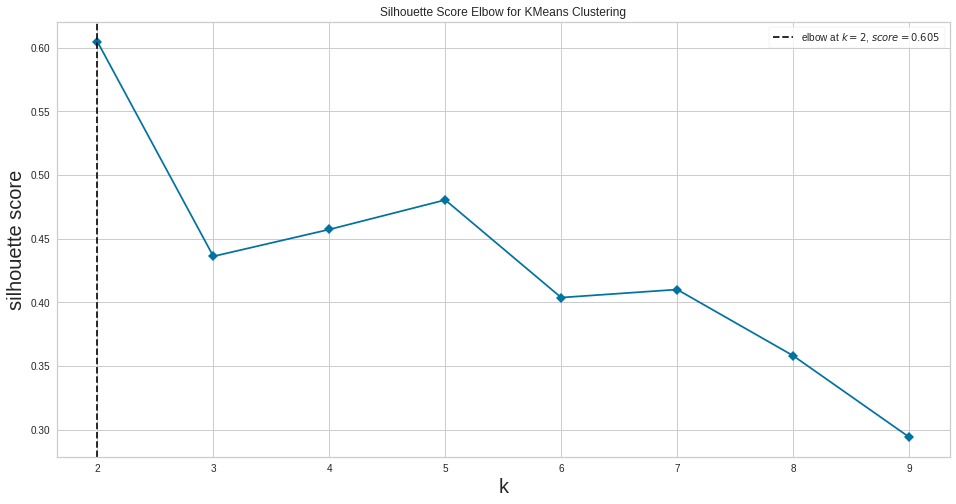

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_MA_2019)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [ ]:
for i in range(2, 7):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_MA_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_MA_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.6046348317045515
Silhouette score for k(clusters)= 3 is 0.41317821170109265
Silhouette score for k(clusters)= 4 is 0.45718482263107246
Silhouette score for k(clusters)= 5 is 0.4622878746216099
Silhouette score for k(clusters)= 6 is 0.4037105804791017


In [ ]:
K = range(2, 7)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_MA_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
# Sum of Square Errors
kmeans.inertia_

0.03751555692294817

In [ ]:
# No. of iterator required to converge
kmeans.n_iter_

2

In [ ]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_MA_2019)
Counter(labels)

Counter({0: 2, 1: 1, 2: 2, 3: 1, 4: 4, 5: 2})

In [ ]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
1,0,2
5,1,1
2,2,2
3,3,1
0,4,4
4,5,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

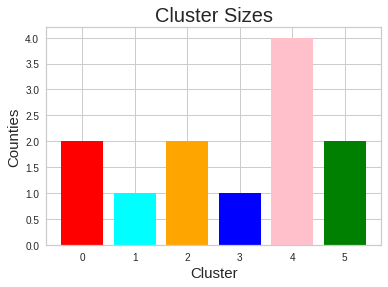

In [ ]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [ ]:
pca_MA_2019['cluster'] = labels
kmeans.cluster_centers_

array([[-0.31345253,  0.11671372],
       [ 1.03896177,  0.4003524 ],
       [-0.07230167, -0.13391688],
       [-0.67017177,  0.44766511],
       [ 0.2137758 , -0.14017035],
       [-0.2261924 , -0.12646489]])

In [ ]:
# Look at outlier
pca_MA_2019[pca_MA_2019.cluster==2][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
2,-0.115381,-0.146826
9,-0.029222,-0.121008


In [ ]:
km = KMeans(n_clusters=6)
kmeans = km.fit(pca_MA_2019)

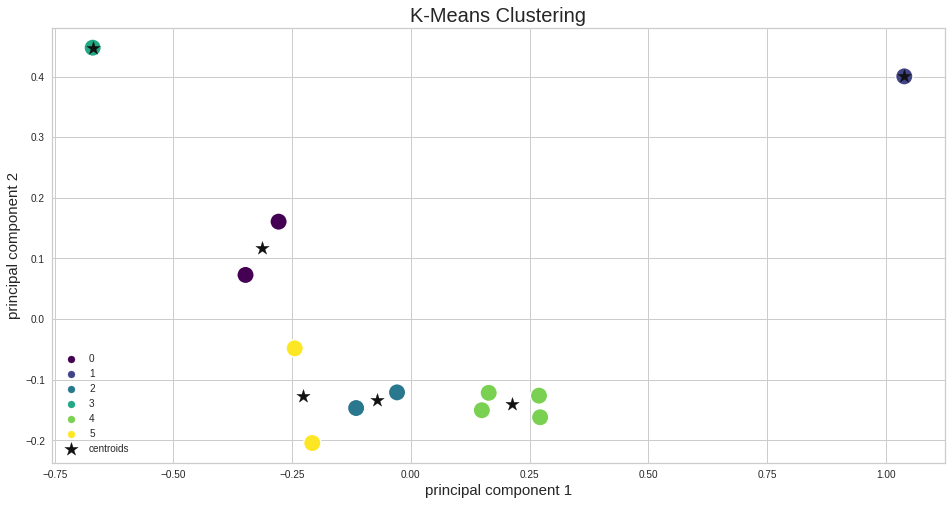

In [ ]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2019, palette = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.legend()
plt.show()

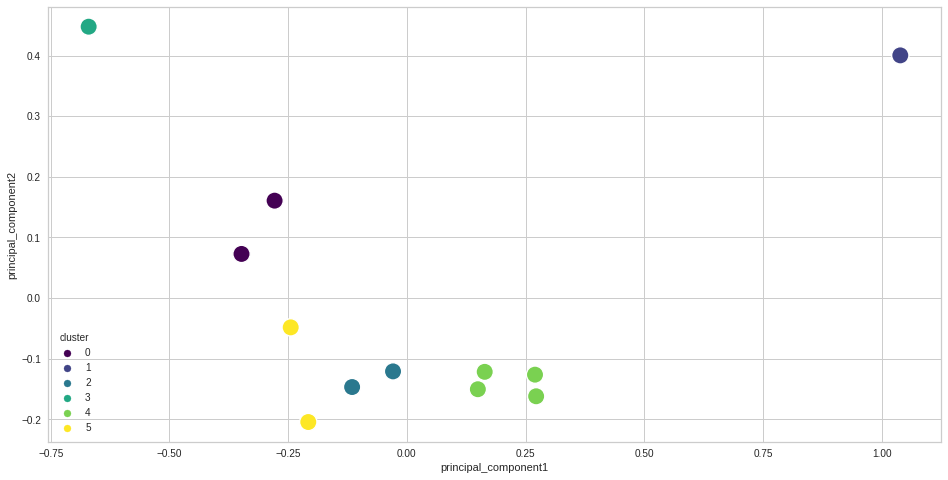

In [ ]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2019, palette = 'viridis')

### Identifying the Scatterplot Bubble
Below identifies the cluster 

In [ ]:
pca_MA_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   principal_component1  12 non-null     float64
 1   principal_component2  12 non-null     float64
 2   cluster               12 non-null     int32  
dtypes: float64(2), int32(1)
memory usage: 368.0 bytes


In [ ]:
MA_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1077 to 1088
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   12 non-null     int64  
 1   state                  12 non-null     object 
 2   county                 12 non-null     object 
 3   density                12 non-null     int64  
 4   rural_%                12 non-null     float64
 5   rural_cat              12 non-null     int64  
 6   average_listing_price  12 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 768.0+ bytes


In [ ]:
MA_2019['cluster']=labels
MA_2019[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
1077,Barnstable County,581,966429.416667,7.483047,4
1078,Berkshire County,139,631492.666667,31.593748,0
1079,Bristol County,1047,475299.666667,9.834302,2


In [ ]:
MA_2019[(MA_2019['cluster']==0)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
1078,25003,MA,Berkshire County,139,31.593748,2,631492.666667,0
1083,25015,MA,Hampshire County,307,27.443699,2,421683.500000,0


In [ ]:
MA_2019

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
1077,25001,MA,Barnstable County,581,7.483047,2,9.664294e+05,4
1078,25003,MA,Berkshire County,139,31.593748,2,6.314927e+05,0
1079,25005,MA,Bristol County,1047,9.834302,2,4.752997e+05,2
1080,25009,MA,Essex County,1644,4.244045,2,8.081962e+05,4
1081,25011,MA,Franklin County,101,54.431710,1,3.365358e+05,3
1082,25013,MA,Hampden County,754,8.570843,2,3.085722e+05,5
1083,25015,MA,Hampshire County,307,27.443699,2,4.216835e+05,0
1084,25017,MA,Middlesex County,1995,3.027706,2,9.772631e+05,4
1085,25021,MA,Norfolk County,1832,1.240489,2,9.615623e+05,4
1086,25023,MA,Plymouth County,805,10.307747,2,6.549784e+05,2


### Identifies the Cluster's Properties

In [ ]:
cluster_properties(MA_2019)

cluster  density                   average_listing_price                \
               min     mean      max                   min          mean   
0       0    139.0    223.0    307.0          4.216835e+05  5.265881e+05   
1       1  13722.0  13722.0  13722.0          1.471328e+06  1.471328e+06   
2       2    805.0    926.0   1047.0          4.752997e+05  5.651390e+05   
3       3    101.0    101.0    101.0          3.365358e+05  3.365358e+05   
4       4    581.0   1513.0   1995.0          8.081962e+05  9.283628e+05   
5       5    570.0    662.0    754.0          3.085722e+05  3.686087e+05   

                   rural_%                       rural_cat           count  
            max        min       mean        max       min mean  max        
0  6.314927e+05  27.443699  29.518724  31.593748       2.0  2.0  2.0   2.0  
1  1.471328e+06   0.074091   0.074091   0.074091       2.0  2.0  2.0   1.0  
2  6.549784e+05   9.834302  10.071024  10.307747       2.0  2.0  2.0   2.0  
3  3.365358e+05  54.431710  54.431710  54.431710       1.0  1.0  1.0   1.0  
4  9.772631e+05   1.240489   3.998822   7.483047       2.0  2.0  2.0   4.0  
5  4.286452e+05   8.570843  13.480565  18.390286       2.0  2.0  2.0   2.0

### 2.3b For the Year 2021

In [ ]:
MA_2021 = df_FIPS_2021[(df_FIPS_2021['state'] == 'MA')]
MA_2021.shape

(12, 7)

In [ ]:
scale =scaler.fit_transform(MA_2021[['density', 'average_listing_price', 'rural_%']])
MA_2021_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
MA_2021_scale.head(5) 

,density,average_listing_price,rural_%
0,0.035240,0.912252,0.136300
1,0.002790,0.496581,0.579857
2,0.069452,0.237933,0.179556
3,0.113281,0.465456,0.076713
4,0.000000,0.049693,1.000000


In [ ]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(MA_2021_scale)
pca_MA_2021 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_MA_2021.head(5)

,principal_component1,principal_component2
0,0.367718,-0.028177
1,-0.166281,0.213939
2,-0.102773,-0.151526
3,0.129774,-0.155334
4,-0.694705,0.443297


### Determine Optimal Clusters (Elbow Method)

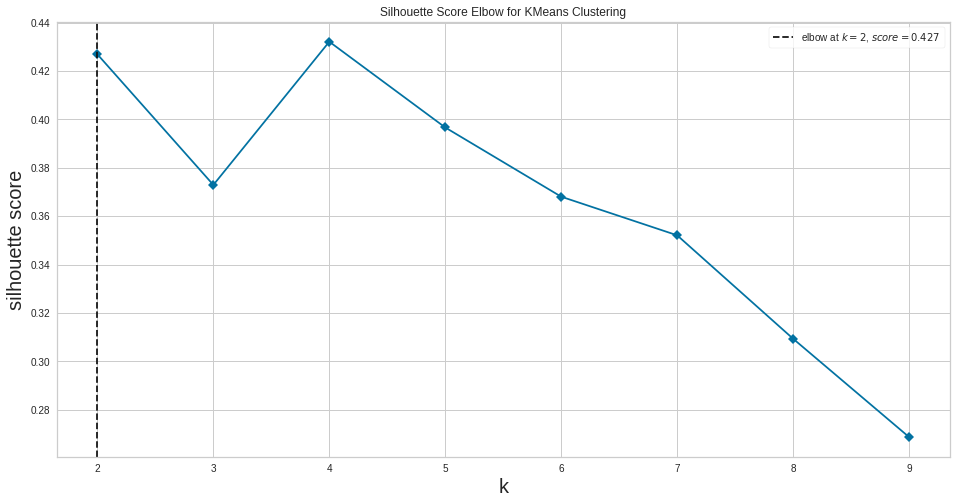

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_MA_2021)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)

visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [ ]:
for i in range(2, 7):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_MA_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_MA_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.42691137280840374
Silhouette score for k(clusters)= 3 is 0.3729331080138208
Silhouette score for k(clusters)= 4 is 0.43213287544745466
Silhouette score for k(clusters)= 5 is 0.39667566797119
Silhouette score for k(clusters)= 6 is 0.3680727251459903


In [ ]:
K = range(2, 7)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_MA_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
# Sum of Square Errors
kmeans.inertia_

0.08158423750928535

In [ ]:
# No. of iteration required to converge
kmeans.n_iter_

2

In [ ]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_MA_2021)
Counter(labels)

Counter({0: 4, 1: 3, 2: 1, 3: 1, 4: 1, 5: 2})

In [ ]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
0,0,4
2,1,3
3,2,1
5,3,1
1,4,1
4,5,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

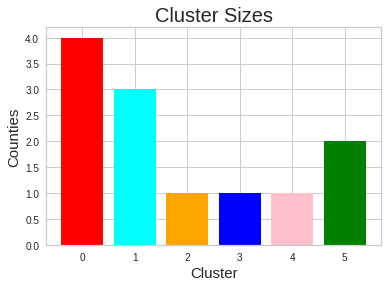

In [ ]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [ ]:
pca_MA_2021['cluster'] = labels
kmeans.cluster_centers_

array([[ 0.245197  , -0.1192016 ],
       [-0.14489136, -0.1764593 ],
       [-0.694705  ,  0.44329703],
       [ 0.98453515,  0.36218793],
       [-0.16628127,  0.21393861],
       [-0.33483139, -0.00661963]])

In [ ]:
# Look at outlier
pca_MA_2021[pca_MA_2021.cluster==1][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
2,-0.102773,-0.151526
5,-0.265632,-0.243611
9,-0.066268,-0.134240


In [ ]:
km = KMeans(n_clusters=6)
kmeans = km.fit(pca_MA_2021)

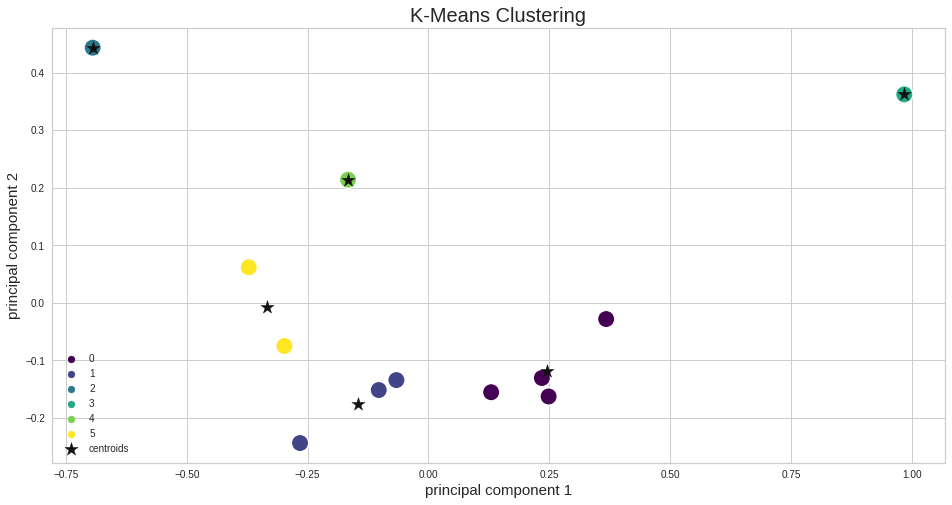

In [ ]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2021, palette = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.legend()
plt.show()

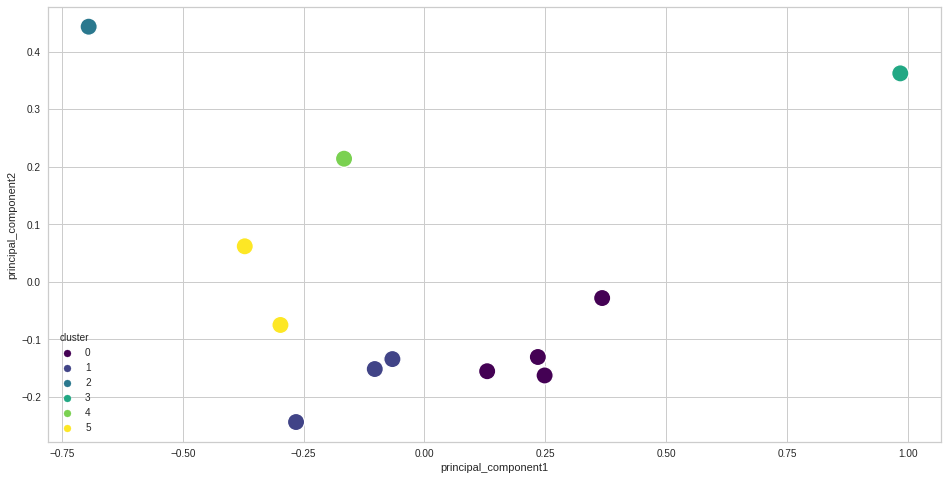

In [ ]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2021, palette = 'viridis')

### Identifying the Scatterplot Bubble
Below identifies the cluster 

In [ ]:
pca_MA_2021.head(3)

,principal_component1,principal_component2,cluster
0,0.367718,-0.028177,0
1,-0.166281,0.213939,4
2,-0.102773,-0.151526,1


In [ ]:
MA_2021['cluster']=labels
MA_2021[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
1102,Barnstable County,581,1.476872e+06,7.483047,0
1103,Berkshire County,139,9.752928e+05,31.593748,4
1104,Bristol County,1047,6.631889e+05,9.834302,1


In [ ]:
MA_2021[(MA_2021['cluster']==0)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
1102,25001,MA,Barnstable County,581,7.483047,2,1.476872e+06,0
1105,25009,MA,Essex County,1644,4.244045,2,9.377348e+05,0
1109,25017,MA,Middlesex County,1995,3.027706,2,1.078144e+06,0
1110,25021,MA,Norfolk County,1832,1.240489,2,1.083184e+06,0


In [ ]:
MA_2021

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
1102,25001,MA,Barnstable County,581,7.483047,2,1.476872e+06,0
1103,25003,MA,Berkshire County,139,31.593748,2,9.752928e+05,4
1104,25005,MA,Bristol County,1047,9.834302,2,6.631889e+05,1
1105,25009,MA,Essex County,1644,4.244045,2,9.377348e+05,0
1106,25011,MA,Franklin County,101,54.431710,1,4.360453e+05,2
1107,25013,MA,Hampden County,754,8.570843,2,3.760823e+05,1
1108,25015,MA,Hampshire County,307,27.443699,2,5.355079e+05,5
1109,25017,MA,Middlesex County,1995,3.027706,2,1.078144e+06,0
1110,25021,MA,Norfolk County,1832,1.240489,2,1.083184e+06,0
1111,25023,MA,Plymouth County,805,10.307747,2,7.506079e+05,1


### Identifies the Cluster's Properties

In [ ]:
cluster_properties(MA_2021)

cluster  density                        average_listing_price                \
               min          mean      max                   min          mean   
0       0    581.0   1513.000000   1995.0          9.377348e+05  1.143984e+06   
1       1    754.0    868.666667   1047.0          3.760823e+05  5.966264e+05   
2       2    101.0    101.000000    101.0          4.360453e+05  4.360453e+05   
3       3  13722.0  13722.000000  13722.0          1.582755e+06  1.582755e+06   
4       4    139.0    139.000000    139.0          9.752928e+05  9.752928e+05   
5       5    307.0    438.500000    570.0          4.960157e+05  5.157618e+05   

                   rural_%                       rural_cat           count  
            max        min       mean        max       min mean  max        
0  1.476872e+06   1.240489   3.998822   7.483047       2.0  2.0  2.0   4.0  
1  7.506079e+05   8.570843   9.570964  10.307747       2.0  2.0  2.0   3.0  
2  4.360453e+05  54.431710  54.431710  54.431710       1.0  1.0  1.0   1.0  
3  1.582755e+06   0.074091   0.074091   0.074091       2.0  2.0  2.0   1.0  
4  9.752928e+05  31.593748  31.593748  31.593748       2.0  2.0  2.0   1.0  
5  5.355079e+05  18.390286  22.916993  27.443699       2.0  2.0  2.0   2.0

# 3. Save to CSV
PCA K-Means with cluster:
- FIPS - df_FIPS_2019.csv and df_FIPS_2021.csv
- Arizona - df_AZ_2019.csv and df_AZ_2021.csv
- Massachusetts - df_MA_2019.csv and df_MA_2021.csv

In [ ]:
FIPS_2019.to_csv('df_FIPS_2019.csv', index=False)
FIPS_2021.to_csv('df_FIPS_2021.csv', index=False)
AZ_2019.to_csv('df_AZ_2019.csv', index=False)
AZ_2021.to_csv('df_AZ_2021.csv', index=False)
MA_2019.to_csv('df_MA_2019.csv', index=False)
MA_2021.to_csv('df_MA_2021.csv', index=False)